In [20]:
# Scratch work, attempt 2

In [21]:
# Required imports
import nltk
from nltk.corpus import names
import random
import pandas as pd
import seaborn as sns
# Set seed to make random sampling reproducible
random.seed(123)

In [22]:
labeled_names = ([(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')])
random.shuffle(labeled_names)

In [23]:
names_male = names.words('male.txt')

In [24]:
(names_male[:5])

['Aamir', 'Aaron', 'Abbey', 'Abbie', 'Abbot']

In [25]:
print(len(names_male))

2943


In [26]:
names_female = names.words('female.txt')
(names_female[:5])

['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi']

In [27]:
print(len(names_female))

5001


In [28]:
len(names_male) + len(names_female)

7944

In [29]:
df_male_names = pd.DataFrame(names_male, columns=['name'])
df_male_names['gender'] = 'male'
df_male_names.head()

,name,gender
0,Aamir,male
1,Aaron,male
2,Abbey,male
3,Abbie,male
4,Abbot,male


In [30]:
df_female_names = pd.DataFrame(names_female, columns=['name'])
df_female_names['gender'] = 'female'
df_female_names.head()

,name,gender
0,Abagael,female
1,Abagail,female
2,Abbe,female
3,Abbey,female
4,Abbi,female


In [31]:
df_names = pd.concat([df_female_names, df_male_names], ignore_index=True)
# lowercase all letters to ensure uniformity
df_names['name'] = df_names['name'].str.lower()
df_names.head(-5)

,name,gender
0,abagael,female
1,abagail,female
2,abbe,female
3,abbey,female
4,abbi,female
...,...,...
7934,zed,male
7935,zedekiah,male
7936,zeke,male
7937,zelig,male


In [32]:
df_names['SW1L'] = df_names['name'].astype(str).str[0]
df_names['SW2L'] = df_names['name'].astype(str).str[0:2]
df_names['SW3L'] = df_names['name'].astype(str).str[0:3]
df_names['EW1L'] = df_names['name'].astype(str).str[-1]
df_names['EW2L'] = df_names['name'].astype(str).str[-2:]
df_names.head()

,name,gender,SW1L,SW2L,SW3L,EW1L,EW2L
0,abagael,female,a,ab,aba,l,el
1,abagail,female,a,ab,aba,l,il
2,abbe,female,a,ab,abb,e,be
3,abbey,female,a,ab,abb,y,ey
4,abbi,female,a,ab,abb,i,bi


In [33]:
df_names.name.str.len().max()

15

In [34]:
df_names.name.str.len().min()

2

In [35]:
df_names_short = df_names.loc[df_names['name'].str.len() < 3]
df_names_short.head(20)

,name,gender,SW1L,SW2L,SW3L,EW1L,EW2L
51,ag,female,a,ag,ag,g,ag
606,bo,female,b,bo,bo,o,bo
1337,di,female,d,di,di,i,di
1587,em,female,e,em,em,m,em
2446,jo,female,j,jo,jo,o,jo
2757,ki,female,k,ki,ki,i,ki
2850,la,female,l,la,la,a,la
4843,vi,female,v,vi,vi,i,vi
5046,al,male,a,al,al,l,al
5323,bo,male,b,bo,bo,o,bo


In [36]:
df_names_long = df_names.loc[df_names['name'].str.len() > 12]
df_names_long.head(20)

,name,gender,SW1L,SW2L,SW3L,EW1L,EW2L
2134,helen-elizabeth,female,h,he,hel,h,th
4400,sheila-kathryn,female,s,sh,she,n,yn
4402,sheilakathryn,female,s,sh,she,n,yn
4672,theresa-marie,female,t,th,the,e,ie
6294,jean-christophe,male,j,je,jea,e,he
6295,jean-francois,male,j,je,jea,s,is


## Some EDA

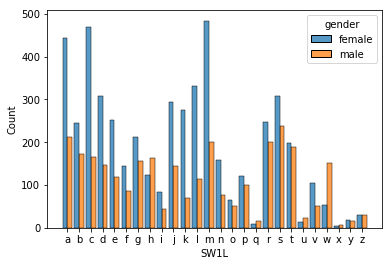

In [37]:
sns.histplot(data=df_names, x="SW1L", hue="gender", multiple="dodge", shrink=.8)

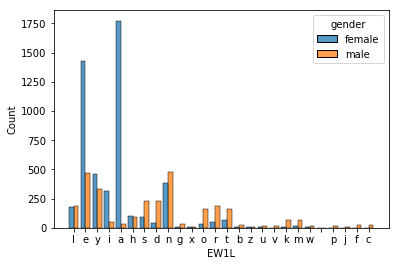

In [38]:
sns.histplot(data=df_names, x="EW1L", hue="gender", multiple="dodge", shrink=.8)

## Scikit learn example

In [39]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
import matplotlib.pyplot as plt

from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

In [40]:
clf_svm = svm.SVC(gamma=0.001)

In [41]:
df_names_factors = df_names

In [42]:
df_names_factors['gender'] = df_names_factors['gender'].factorize()[0] 
df_names_factors['SW1L'] = df_names_factors['SW1L'].factorize()[0] 
df_names_factors['EW1L'] = df_names_factors['EW1L'].factorize()[0] 
df_names_factors['SW2L'] = df_names_factors['SW2L'].factorize()[0] 
df_names_factors['EW2L'] = df_names_factors['EW2L'].factorize()[0] 
df_names_factors['SW3L'] = df_names_factors['SW3L'].factorize()[0] 
df_names_factors.head()

,name,gender,SW1L,SW2L,SW3L,EW1L,EW2L
0,abagael,0,0,0,0,0,0
1,abagail,0,0,0,0,0,1
2,abbe,0,0,0,1,1,2
3,abbey,0,0,0,1,2,3
4,abbi,0,0,0,1,3,4


In [43]:
df_names_factors_clf_in = df_names_factors[['SW1L','EW1L','SW2L','EW2L','SW3L']]
df_names_factors_clf_in.head()

,SW1L,EW1L,SW2L,EW2L,SW3L
0,0,0,0,0,0
1,0,0,0,1,0
2,0,1,0,2,1
3,0,2,0,3,1
4,0,3,0,4,1


In [44]:
df_names_factors_clf_tar = df_names_factors[['gender']]
df_names_factors_clf_tar.head()

,gender
0,0
1,0
2,0
3,0
4,0


In [45]:
X_train, X_test, y_train, y_test = train_test_split(df_names_factors_clf_in, 
                                                    df_names_factors_clf_tar,
                                                    test_size=0.5, shuffle=True)

In [46]:
clf_svm.fit(X_train, y_train)

/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.001)

In [47]:
pred_svm = clf_svm.predict(X_test)

In [48]:
print(
    f"Classification report for classifier {clf_svm}:\n"
    f"{metrics.classification_report(y_test, pred_svm)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      2494
           1       0.84      0.55      0.66      1478

    accuracy                           0.79      3972
   macro avg       0.81      0.74      0.76      3972
weighted avg       0.80      0.79      0.78      3972




Confusion matrix:
[[2343  151]
 [ 668  810]]


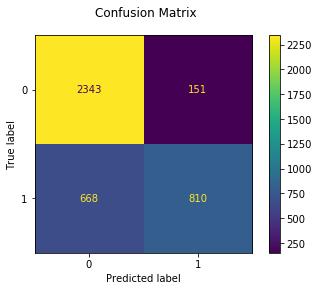

In [49]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_svm)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [50]:
# Let's try Naive Bayes
# https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import GaussianNB

In [51]:
clf_gnb = GaussianNB()

In [52]:
clf_gnb.fit(X_train, y_train)

/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [53]:
pred_gnb = clf_gnb.predict(X_test)

In [54]:
print(
    f"Classification report for classifier {clf_gnb}:\n"
    f"{metrics.classification_report(y_test, pred_gnb)}\n"
)

Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.78      0.90      0.84      2494
           1       0.77      0.57      0.66      1478

    accuracy                           0.78      3972
   macro avg       0.78      0.74      0.75      3972
weighted avg       0.78      0.78      0.77      3972




Confusion matrix:
[[2243  251]
 [ 634  844]]


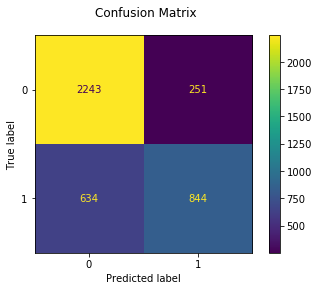

In [55]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_gnb)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2494
           1       0.72      0.71      0.72      1478

    accuracy                           0.79      3972
   macro avg       0.77      0.77      0.77      3972
weighted avg       0.79      0.79      0.79      3972


Confusion matrix:
[[2079  415]
 [ 424 1054]]


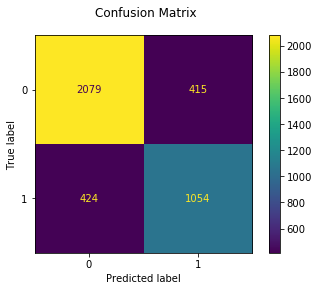

In [56]:
# Decision tree
# https://scikit-learn.org/stable/modules/tree.html#classification
from sklearn import tree

clf_dtr = tree.DecisionTreeClassifier()
clf_dtr.fit(X_train, y_train)
pred_dtr = clf_dtr.predict(X_test)
print(
    f"Classification report for classifier {clf_dtr}:\n"
    f"{metrics.classification_report(y_test, pred_dtr)}\n"
)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_dtr)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [57]:
clf_dtr.feature_importances_

array([0.03743875, 0.3223506 , 0.09899908, 0.18120091, 0.36001065])

/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification report for classifier KNeighborsClassifier(n_neighbors=10):
              precision    recall  f1-score   support

           0       0.77      0.94      0.85      2494
           1       0.84      0.53      0.65      1478

    accuracy                           0.79      3972
   macro avg       0.81      0.74      0.75      3972
weighted avg       0.80      0.79      0.78      3972


Confusion matrix:
[[2342  152]
 [ 689  789]]


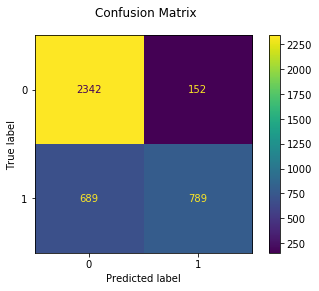

In [58]:
# kNN
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py
from sklearn import neighbors, datasets
n_neighbors = 10
clf_knn = neighbors.KNeighborsClassifier(n_neighbors)
clf_knn.fit(X_train, y_train)
pred_knn = clf_knn.predict(X_test)
print(
    f"Classification report for classifier {clf_knn}:\n"
    f"{metrics.classification_report(y_test, pred_knn)}\n"
)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_knn)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [59]:
# Voting classifier
# https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')

clf_lr = LogisticRegression(random_state=1)
clf_rf = RandomForestClassifier(n_estimators=50, random_state=1)
clf_nb = GaussianNB()

eclf = VotingClassifier(
    estimators=[('lr', clf_lr), ('rf', clf_rf), ('gnb', clf_nb)],
    voting='hard')

for clf, label in zip([clf_lr, clf_rf, clf_nb, eclf], ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.80 (+/- 0.01) [Logistic Regression]
Accuracy: 0.81 (+/- 0.01) [Random Forest]
Accuracy: 0.78 (+/- 0.01) [Naive Bayes]
Accuracy: 0.81 (+/- 0.01) [Ensemble]


In [60]:
labeled_names = ([(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')])
random.seed(123)
random.shuffle(labeled_names)
labeled_names
df_names = pd.DataFrame(labeled_names, columns=['name','gender'])
df_names['name'] = df_names['name'].str.lower()
df_names.head(-5)

,name,gender
0,cordelie,female
1,peggie,female
2,solange,female
3,rana,female
4,jessy,female
...,...,...
7934,rosina,female
7935,shirline,female
7936,paulita,female
7937,fraser,male


In [61]:
df_names['SW1L'] = df_names['name'].astype(str).str[0]
df_names['SW2L'] = df_names['name'].astype(str).str[0:2]
df_names['SW3L'] = df_names['name'].astype(str).str[0:3]
df_names['EW1L'] = df_names['name'].astype(str).str[-1]
df_names['EW2L'] = df_names['name'].astype(str).str[-2:]
df_names['length'] = df_names['name'].str.len()
df_names.head()

,name,gender,SW1L,SW2L,SW3L,EW1L,EW2L,length
0,cordelie,female,c,co,cor,e,ie,8
1,peggie,female,p,pe,peg,e,ie,6
2,solange,female,s,so,sol,e,ge,7
3,rana,female,r,ra,ran,a,na,4
4,jessy,female,j,je,jes,y,sy,5


In [62]:
df_names_factors = df_names

In [63]:
df_names_factors['f_gender'] = df_names_factors['gender'].factorize()[0] 
df_names_factors['f_SW1L'] = df_names_factors['SW1L'].factorize()[0] 
df_names_factors['f_EW1L'] = df_names_factors['EW1L'].factorize()[0] 
df_names_factors['f_SW2L'] = df_names_factors['SW2L'].factorize()[0] 
df_names_factors['f_EW2L'] = df_names_factors['EW2L'].factorize()[0] 
df_names_factors['f_SW3L'] = df_names_factors['SW3L'].factorize()[0] 
df_names_factors.head()

,name,gender,SW1L,SW2L,SW3L,EW1L,EW2L,length,f_gender,f_SW1L,f_EW1L,f_SW2L,f_EW2L,f_SW3L
0,cordelie,female,c,co,cor,e,ie,8,0,0,0,0,0,0
1,peggie,female,p,pe,peg,e,ie,6,0,1,0,1,0,1
2,solange,female,s,so,sol,e,ge,7,0,2,0,2,1,2
3,rana,female,r,ra,ran,a,na,4,0,3,1,3,2,3
4,jessy,female,j,je,jes,y,sy,5,0,4,2,4,3,4


In [64]:
# 500 for final evaluation
df_test_names = df_names_factors[:500]
# 500 for progress
df_devtest_names = df_names_factors[500:1000]
# Remainder of labeled names
df_train_names = df_names_factors[1000:]

In [65]:
df_train_factors_clf_in = df_train_names[['f_SW1L','f_EW1L','f_SW2L','f_EW2L','f_SW3L','length']]
df_train_factors_clf_in.head()
df_train_factors_clf_tar = df_train_names[['f_gender']]
df_train_factors_clf_tar.head()

,f_gender
1000,0
1001,1
1002,0
1003,0
1004,1


In [66]:
df_devtest_factors_clf_in = df_devtest_names[['f_SW1L','f_EW1L','f_SW2L','f_EW2L','f_SW3L','length']]
#df_train_factors_clf_in.head()
df_devtest_factors_clf_tar = df_devtest_names[['f_gender']]
df_devtest_factors_clf_tar.head()

,f_gender
500,1
501,1
502,1
503,0
504,0


In [67]:
df_test_factors_clf_in = df_test_names[['f_SW1L','f_EW1L','f_SW2L','f_EW2L','f_SW3L','length']]
#df_test_factors_clf_in.head()
df_test_factors_clf_tar = df_test_names[['f_gender']]
df_test_factors_clf_tar.head()

,f_gender
0,0
1,0
2,0
3,0
4,0


In [68]:
clf_svm.fit(df_train_factors_clf_in, df_train_factors_clf_tar)

SVC(gamma=0.001)

In [69]:
pred_svm = clf_svm.predict(df_devtest_factors_clf_in)

In [70]:
print(
    f"Classification report for classifier {clf_svm}:\n"
    f"{metrics.classification_report(df_devtest_factors_clf_tar, pred_svm)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       314
           1       0.63      0.37      0.46       186

    accuracy                           0.68       500
   macro avg       0.66      0.62      0.62       500
weighted avg       0.67      0.68      0.66       500




Confusion matrix:
[[274  40]
 [118  68]]


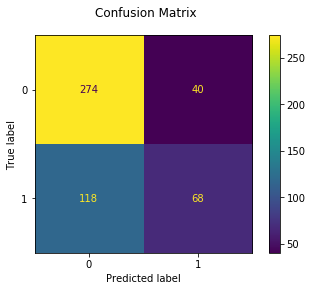

In [71]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(df_devtest_factors_clf_tar, pred_svm)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

from sklearn.model_selection import cross_val_score
clf_svm_cv = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf_svm_cv, df_train_factors_clf_in, df_train_factors_clf_tar, cv=5)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [78]:
clf_lr = LogisticRegression(random_state=1)
clf_rf = RandomForestClassifier(n_estimators=50, random_state=1)
clf_nb = GaussianNB()

eclf = VotingClassifier(
    estimators=[('lr', clf_lr), ('rf', clf_rf), ('gnb', clf_nb)],
    voting='hard')

for clf, label in zip([clf_lr, clf_rf, clf_nb, eclf], ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, df_train_factors_clf_in, df_train_factors_clf_tar, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.73 (+/- 0.01) [Logistic Regression]
Accuracy: 0.78 (+/- 0.01) [Random Forest]
Accuracy: 0.71 (+/- 0.01) [Naive Bayes]
Accuracy: 0.74 (+/- 0.01) [Ensemble]


In [73]:
# Neural Network
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification

from sklearn.neural_network import MLPClassifier
clf_nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

clf_nn.fit(df_train_factors_clf_in, df_train_factors_clf_tar)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

Classification report for classifier MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs'):
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       314
           1       0.79      0.41      0.54       186

    accuracy                           0.74       500
   macro avg       0.76      0.68      0.68       500
weighted avg       0.75      0.74      0.72       500


Confusion matrix:
[[294  20]
 [109  77]]


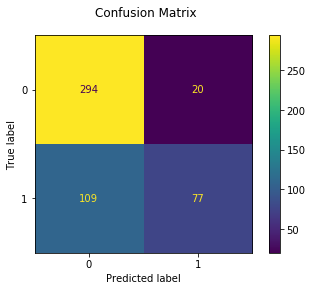

In [74]:
pred_nn = clf_nn.predict(df_devtest_factors_clf_in)
print(
    f"Classification report for classifier {clf_nn}:\n"
    f"{metrics.classification_report(df_devtest_factors_clf_tar, pred_nn)}\n"
)
disp = metrics.ConfusionMatrixDisplay.from_predictions(df_devtest_factors_clf_tar, pred_nn)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Calibration Curve

https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html#sphx-glr-auto-examples-calibration-plot-calibration-curve-py


In [75]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

lr = LogisticRegression(C=1.0)
gnb = GaussianNB()
gnb_isotonic = CalibratedClassifierCV(gnb, cv=2, method="isotonic")
gnb_sigmoid = CalibratedClassifierCV(gnb, cv=2, method="sigmoid")

clf_list = [
    (lr, "Logistic"),
    (gnb, "Naive Bayes"),
    (gnb_isotonic, "Naive Bayes + Isotonic"),
    (gnb_sigmoid, "Naive Bayes + Sigmoid"),
]

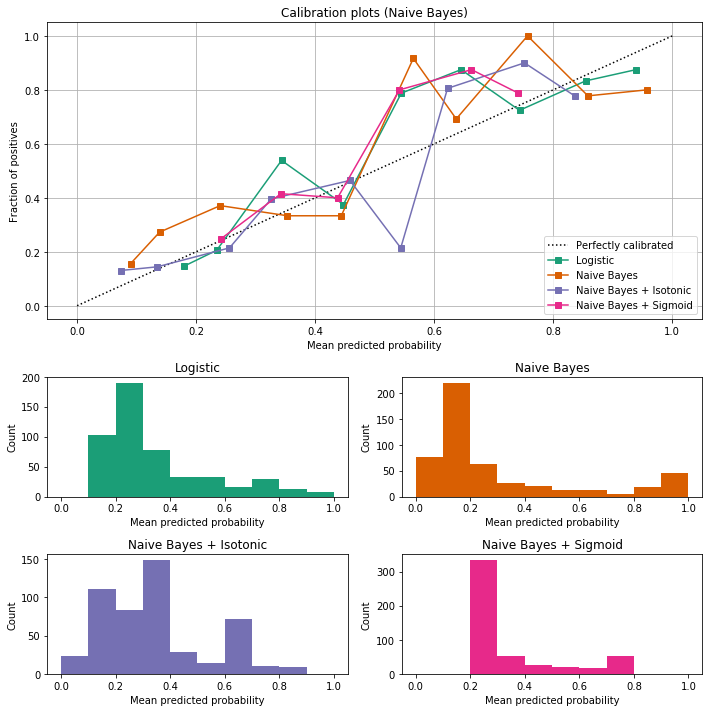

In [76]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(df_train_factors_clf_in, df_train_factors_clf_tar)
    display = CalibrationDisplay.from_estimator(
        clf,
        df_devtest_factors_clf_in,
        df_devtest_factors_clf_tar,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots (Naive Bayes)")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()